In [114]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

reviews = pd.read_csv("/Users/fuyuxin/code/gitworkspace/machine-learning/data/titanic/train.csv")
print(reviews)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

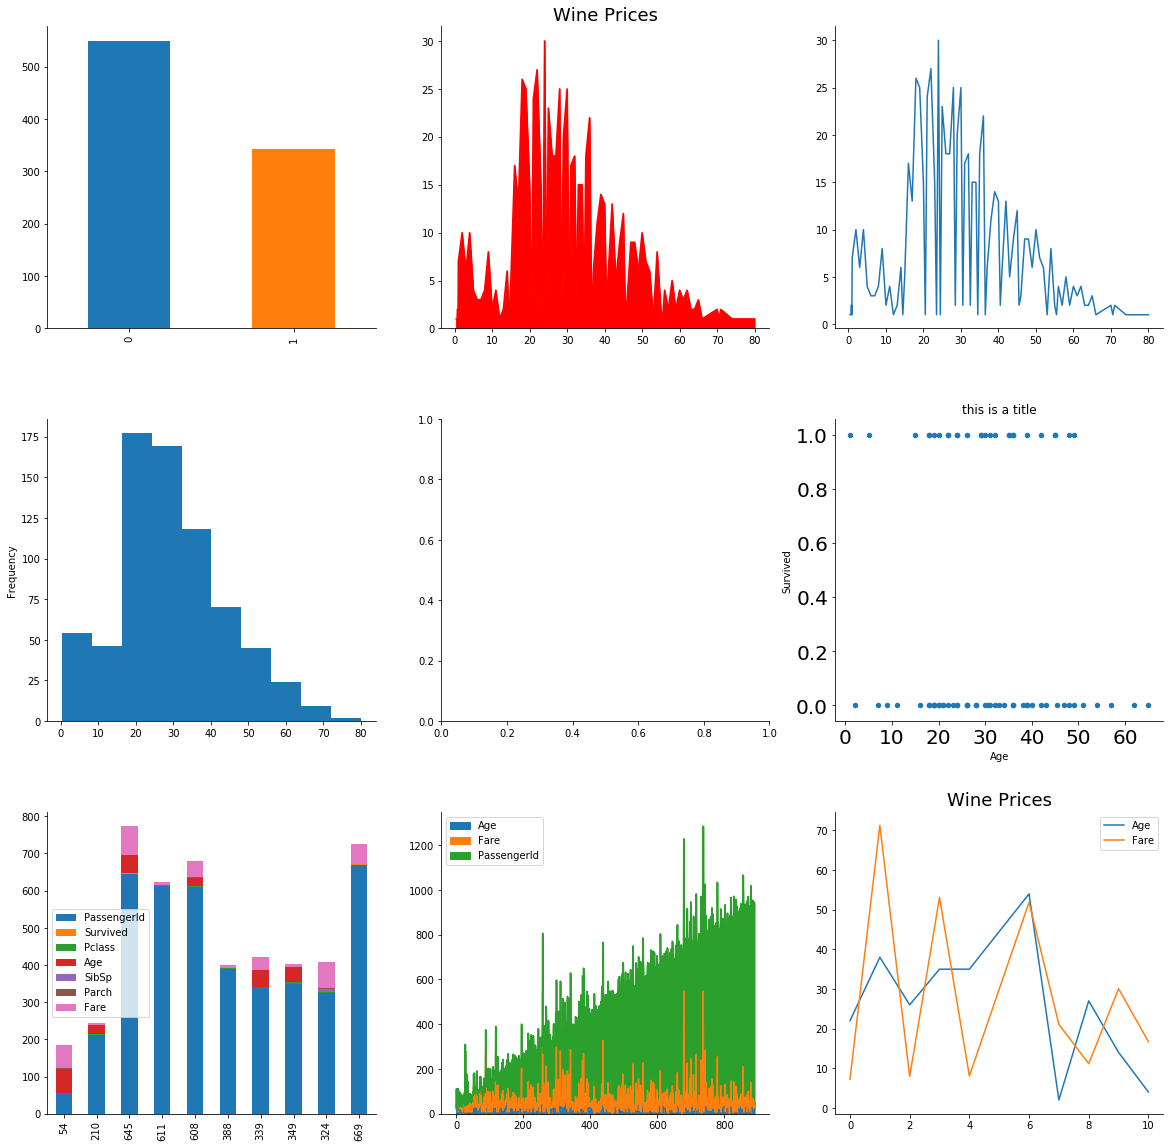

In [139]:
fig, axarr = plt.subplots(3,3, figsize=(180, 180))
reviews.Survived.value_counts().plot.bar(figsize=(20,20),ax=axarr[0][0])
reviews.Age.dropna().value_counts().sort_index().plot.area(color="red",ax=axarr[0][1])
reviews.Age.dropna().value_counts().sort_index().plot.line(ax=axarr[0][2])
reviews.Age.dropna().plot.hist(ax=axarr[1][0])
reviews.sample(100).plot.scatter(x="Age",y="Survived",fontsize=20,title="this is a title",ax=axarr[1][2])
reviews.sample(10).plot.bar(stacked=True,ax=axarr[2][0])
reviews[["Age","Fare","PassengerId"]].plot.area(ax=axarr[2][1])
reviews[["Age","Fare"]].dropna().head(10).plot.line(ax=axarr[2][2])
axarr[2][2].set_title("Wine Prices", fontsize=18)
axarr[0][1].set_title("Wine Prices", fontsize=18)
plt.subplots_adjust(hspace=.3)
sns.despine()

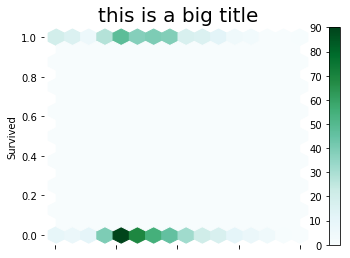

In [112]:
ax = reviews.plot.hexbin(x="Age",y="Survived",gridsize=15)
ax.set_title("this is a big title" , fontsize=20)
sns.despine(bottom=True,left=True)

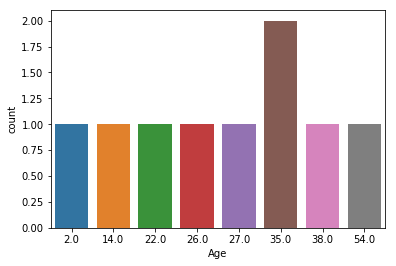

In [56]:
import seaborn as sns
sns.countplot(reviews["Age"].head(10))

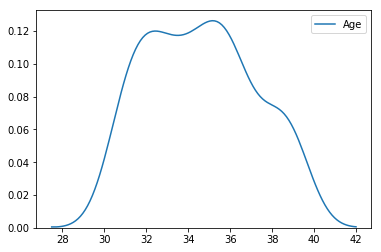

In [66]:
sns.kdeplot(reviews.query('Age > 30 & Age < 40').Age)
#密度曲线

/Users/fuyuxin/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


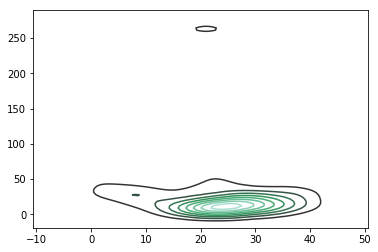

In [69]:
sns.kdeplot(reviews[reviews['Age'] < 40].loc[:, ['Age', 'Fare']].dropna().sample(50))

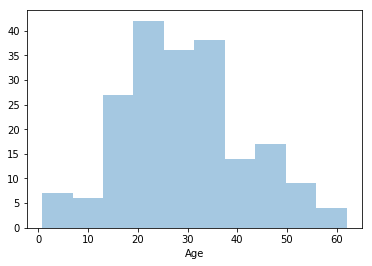

In [84]:
sns.distplot(reviews.Age.dropna().sample(200), bins=10, kde=False)

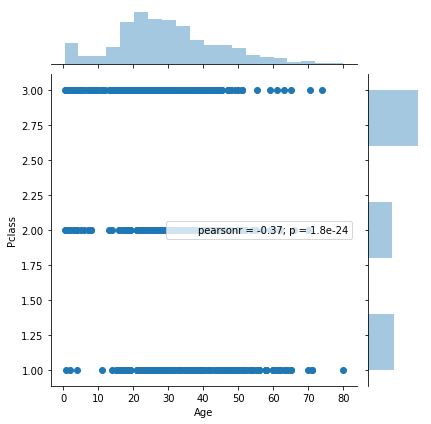

In [85]:
sns.jointplot(x='Age', y='Pclass', data=reviews)

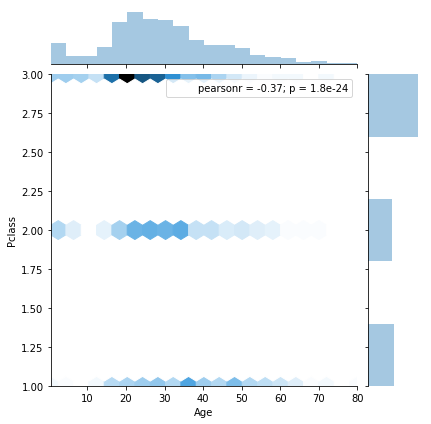

In [86]:
sns.jointplot(x='Age', y='Pclass', data=reviews,kind="hex",gridsize=20)

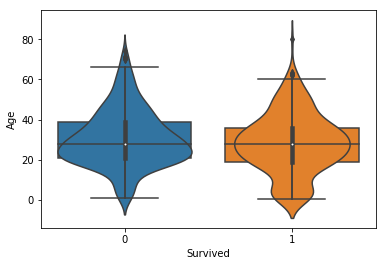

In [90]:
sns.boxplot(
    x='Survived',
    y='Age',
    data=reviews
)


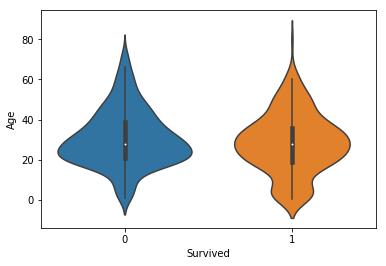

In [92]:
sns.violinplot(
    x='Survived',
    y='Age',
    data=reviews
)

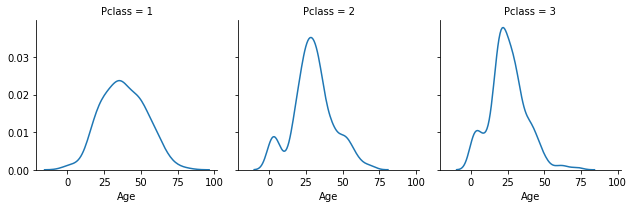

In [93]:
g = sns.FacetGrid(reviews, col="Pclass")
g.map(sns.kdeplot, "Age")

/Users/fuyuxin/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.



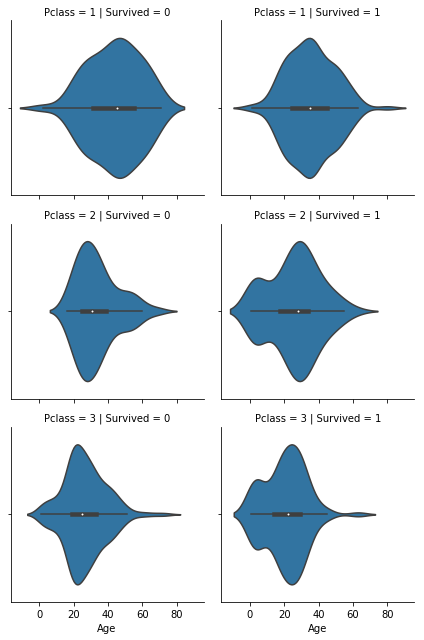

In [97]:
g = sns.FacetGrid(reviews, row="Pclass", col="Survived")
g.map(sns.violinplot, "Age")

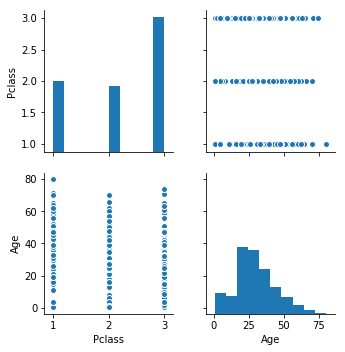

In [101]:
sns.pairplot(reviews[["Pclass","Age"]].dropna())

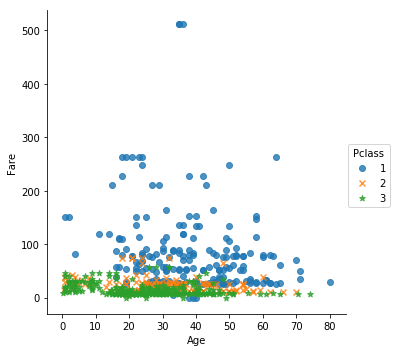

In [142]:
#多变量分析
sns.lmplot(x='Age', y='Fare', hue='Pclass', markers=['o', 'x', '*'],
           data=reviews[["Pclass","Age","Fare"]], 
           fit_reg=False)

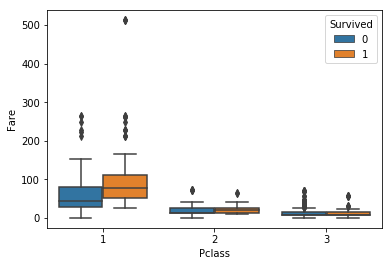

In [145]:
sns.boxplot(x="Pclass", y="Fare", hue='Survived', data=reviews)

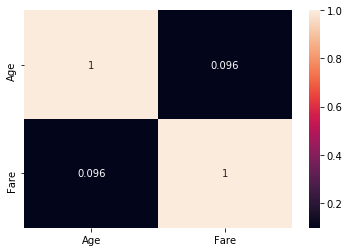

In [149]:
hm = reviews[["Age","Fare"]].dropna().corr()
sns.heatmap(hm,annot=True)

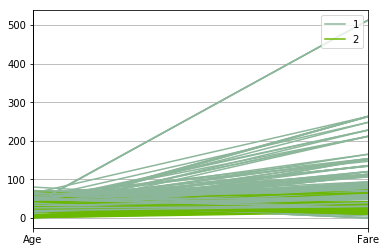

In [164]:
from pandas.plotting import parallel_coordinates
f = (
        reviews
        .loc[:,['Age','Fare',"Pclass"]]
        .loc[reviews['Pclass'].isin([1,2])]
        .dropna()
)
parallel_coordinates(f, 'Pclass')

In [166]:
#使用plotly画可以交互的图
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import plotly.graph_objs as go

iplot([go.Scatter(x=reviews.head(100)['Age'], y=reviews.head(1000)['Fare'], mode='markers')])

In [292]:
iplot([go.Histogram2dContour(x=reviews.head(500)['Age'], 
                             y=reviews.head(500)['Fare'], 
                             contours=go.Contours(coloring='heatmap')),
       go.Scatter(x=reviews.head(1000)['Age'], y=reviews.head(1000)['Fare'], mode='markers')])

/Users/fuyuxin/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:204: DeprecationWarning:

plotly.graph_objs.Contours is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.contour.Contours
  - plotly.graph_objs.surface.Contours
  - etc.




In [173]:
df = reviews.assign(n=0).groupby(['Pclass', 'Survived'])['n'].count().reset_index()
v = df.pivot(index='Pclass', columns='Survived', values='n').fillna(0).values.tolist()
print(df.pivot(index='Pclass', columns='Survived', values='n'))
iplot([go.Surface(z=v)])

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


/Users/fuyuxin/anaconda3/lib/python3.6/site-packages/plotnine/stats/smoothers.py:150: UserWarning:

Confidence intervals are not yet implementedfor lowess smoothings.

/Users/fuyuxin/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:452: UserWarning:

geom_point : Removed 177 rows containing missing values.



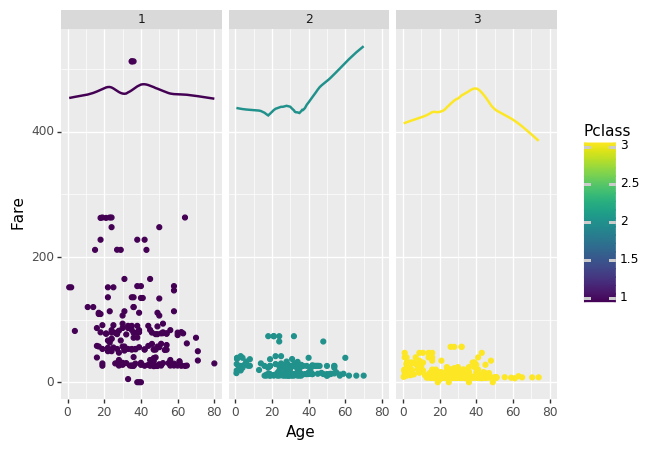

<ggplot: (7585484457)>

In [231]:
#plotnine
from plotnine import *
(ggplot(reviews[["Age","Fare"]]) + aes("Age","Fare") + geom_point())
(ggplot(reviews[["Age","Fare","Pclass","PassengerId"]]) + aes("Age","Fare") + 
 geom_point() + stat_smooth(aes("Age","PassengerId")) + aes(color="Pclass") + facet_wrap('~Pclass'))

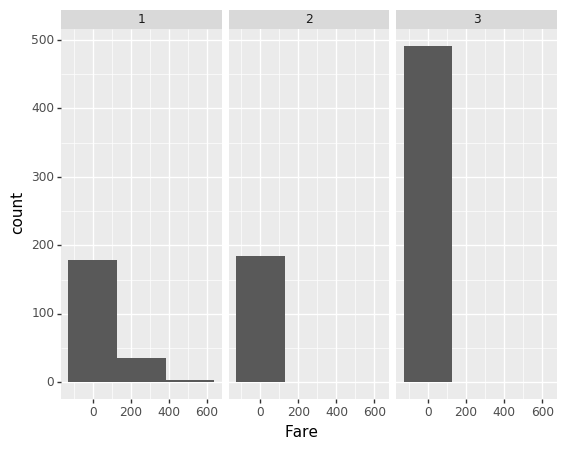

<ggplot: (7042384539)>

In [233]:
(
    ggplot(reviews, aes('Fare'))
        + geom_histogram(bins=3)
) + facet_wrap('~Pclass')

/Users/fuyuxin/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:363: UserWarning:

stat_count : Removed 177 rows containing non-finite values.



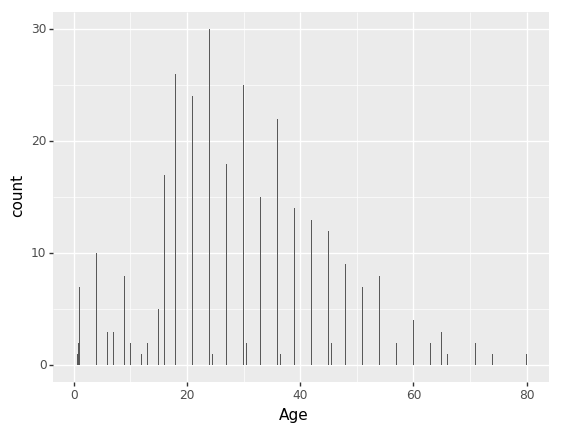

<ggplot: (-9223372029266378075)>

In [214]:
(ggplot(reviews)+aes("Age")+geom_bar())

/Users/fuyuxin/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:363: UserWarning:

stat_bin_2d : Removed 177 rows containing non-finite values.



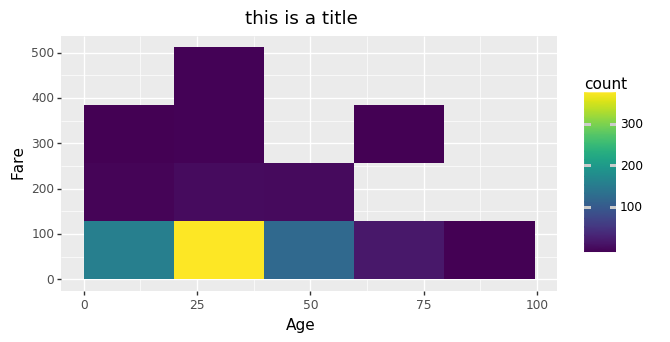

<ggplot: (7588824938)>

In [227]:
(ggplot(reviews)+aes("Age","Fare")+geom_bin2d(bins=4) + ggtitle("this is a title") + coord_fixed(ratio=0.1))

In [291]:
#time series
stocks = pd.read_csv("./data/sample.csv",parse_dates=["date"]).set_index("open")
stocks.head(10)

,date,symbol,close,low,high,volume
open,,,,,,
626.951088,2010-01-04,GOOG,626.751061,624.241073,629.511067,3927000.0
627.181073,2010-01-05,GOOG,623.991055,621.541045,627.841071,6031900.0
625.861078,2010-01-06,GOOG,608.261023,606.361042,625.861078,7987100.0
609.401025,2010-01-07,GOOG,594.101005,592.651008,610.001045,12876600.0
592.000997,2010-01-08,GOOG,602.021036,589.110988,603.251034,9483900.0
626.951088,2010-01-04,GOOG,626.751061,624.241073,629.511067,3927000.0
627.181073,2010-01-05,GOOG,623.991055,621.541045,627.841071,6031900.0
625.861078,2010-01-06,GOOG,608.261023,606.361042,625.861078,7987100.0
627.181073,2012-01-05,GOOG,623.991055,621.541045,627.841071,6031900.0


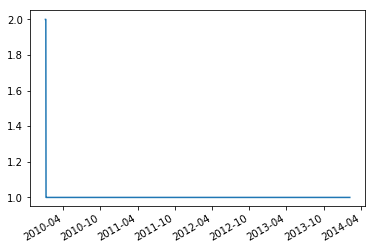

In [270]:
stocks.date.value_counts().sort_index().plot.line()

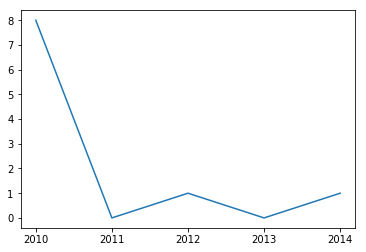

In [272]:
stocks.date.value_counts().resample('Y').sum().plot.line()

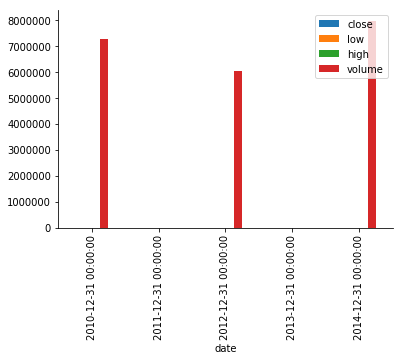

In [286]:
stocks.set_index('date').resample('Y').mean().plot.bar()
sns.despine()

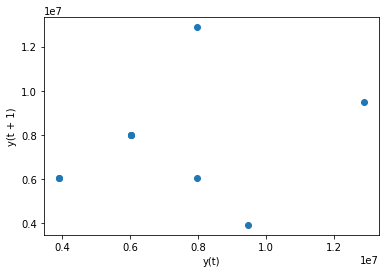

In [289]:
#Lag plot,一个数据下一时刻的对应
from pandas.plotting import lag_plot

lag_plot(stocks['volume'].tail(10))


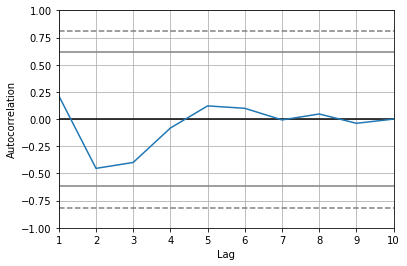

In [290]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(stocks['volume'])
#纵轴是每个时刻的自相关性